In [35]:
import LIME
import ml_models
import data_processing
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy.random import seed
seed(1)

In [36]:
glioma_images = {"axial": 'FYP/predictImages/Glioma/gg (22).jpg' , "sagittal": 'FYP/predictImages/Glioma/gg (105).jpg' , "coronal": 'FYP/predictImages/Glioma/gg (682).jpg',}
meningioma_images = {"axial": 'FYP/predictImages/Meningioma/image(66).jpg' , "sagittal": 'FYP/predictImages/Meningioma/image(47).jpg', "coronal": 'FYP/predictImages/Meningioma/m (39).jpg',}
none_images = {"axial": 'FYP/predictImages/clean/3.jpg' , "sagittal": 'FYP/predictImages/clean/5.jpg', "coronal": 'FYP/predictImages/clean/10.jpg',}
pituitary_images = {"axial": 'FYP/predictImages/Pituitary/p (22).jpg' , "sagittal": 'FYP/predictImages/Pituitary/p (130).jpg', "coronal": 'FYP/predictImages/Pituitary/p (51).jpg',}

In [37]:
original_image = glioma_images["axial"]
model_name = 'model_testing_95'
model_weights = "FYP/histories/Custom_50Epochs.npy"

VGG_Model_Location = 'vgg16_test_98'
VGG_Weights_Location = "FYP/best-weights/VGG_BEST"
VGG_training_history = "FYP/histories/VGG16_history_30Epochs.npy"


Custom_Model_Location = 'model_testing_95'
Custom_Training_History = "FYP/histories/Custom_50Epochs.npy"


ResNet_Model_Location = 'resnet_new_data_91'
ResNet_History = "FYP/histories/ResNet_50Epochs.npy"

Number of superpixels generated: 70 
Mask:


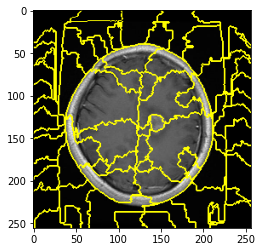

In [38]:
num_superpixels, superpixels = LIME.generateSuperpixels(original_image, (256, 256),3, 300, 0.2)

Number of superpixels generated: 90 
Mask:


C:\Users\Jack\LIME.py:59: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  superpixels = skimage.segmentation.slic(predictArr[0], numSegs, sig)


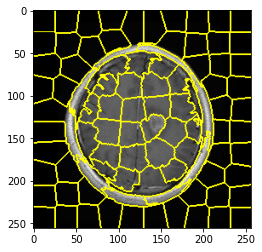

In [39]:
slic_num_superpixels, slic_superpixels = LIME.generateSuperpixelsSLIC(original_image, (256, 256), 100, 15)

In [40]:
gray_image = LIME.generateGrayImage(original_image, (256,256)) 

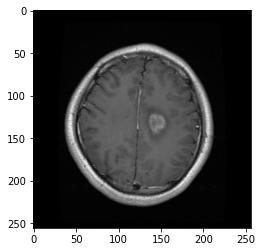

In [41]:
%matplotlib inline
plt.imshow(gray_image[0], cmap = 'gray')

In [42]:
model = ml_models.loadModel(VGG_Model_Location)
model.load_weights(VGG_Weights_Location)
#model = ml_models.loadModel(ResNet_Model_Location)
#model = ml_models.loadModel(Custom_Model_Location)

Model: vgg16_test_98 loaded successfully


In [43]:
# root = 'FYP\predictImages\Pituitary'
# for i in os.listdir(root):
#     gray_image = LIME.generateGrayImage(root + '/' + i, (256,256)) 
#     preds, predClass = LIME.getImageClass(model, gray_image)
    

In [44]:
model.predict(gray_image)

array([[9.7879511e-01, 2.1201737e-02, 9.6637407e-08, 3.0665867e-06]],
      dtype=float32)

In [45]:
preds, predClass = LIME.getImageClass(model, gray_image)

Image Prediction Successfull, Confidences:
[0.9788, 0.0212, 0.0, 0.0]
Predicted Class:
0


# Quickshift Explanation

In [57]:
pert_preds, pert_images, perturbations = LIME.generatePertubations(150, gray_image[0], superpixels, num_superpixels, model)

In [58]:
distances = LIME.generateDistances(num_superpixels, perturbations)

In [59]:
coefficients = LIME.fitLinModel(0.25, distances, 0, pert_preds, perturbations)

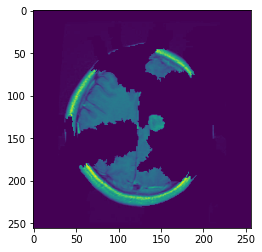

In [60]:
explainer = LIME.showExplanation(25, coefficients, num_superpixels, gray_image[0], superpixels)

# SLIC Explanation

In [50]:
pert_preds, pert_images, perturbations = LIME.generatePertubations(150, gray_image[0], slic_superpixels, slic_num_superpixels, model)

In [51]:
distances = LIME.generateDistances(slic_num_superpixels, perturbations)

In [55]:
coefficients = LIME.fitLinModel(0.25, distances, 0, pert_preds, perturbations)

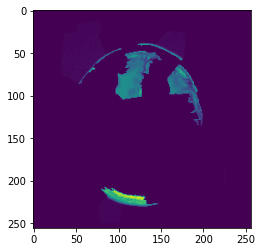

In [56]:
explainer = LIME.showExplanation(15, coefficients, slic_num_superpixels, gray_image[0], slic_superpixels)